# Covid19 Data Analysis Notebook
------------------------------------------

###  Importing the modules 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Importing covid19 dataset


In [3]:
corona_dataset=pd.read_csv("Covid19_Confirmed_dataset.csv")
corona_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [4]:
corona_dataset.drop(["Lat","Long"],axis=1,inplace=True)

### Aggregating the rows by the country

In [5]:
corona_dataset_aggregated = corona_dataset.groupby("Country/Region").sum()  
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


###  Visualizing data 

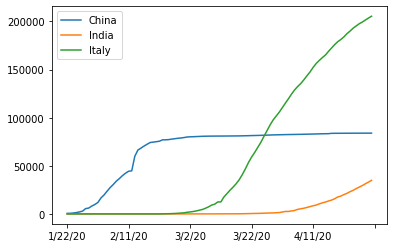

In [6]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
plt.legend()

### Calculating a good measure 
 

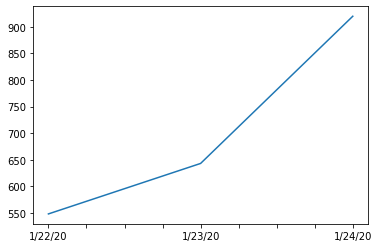

In [7]:
corona_dataset_aggregated.loc['China'][:3].plot()

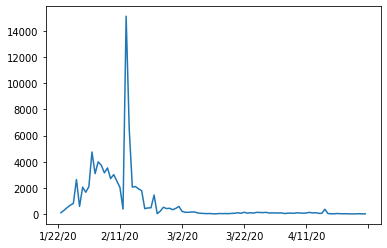

In [8]:
corona_dataset_aggregated.loc['China'].diff().plot()

### Maximum infection rate for all of the countries

In [9]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates =[]
for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"]=max_infection_rates

In [10]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [11]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [12]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Importing the happiness report dataset

In [13]:
world_happiness_report = pd.read_csv("worldwide_happiness_report.csv")

In [14]:
world_happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [15]:
useless_cols =["Overall rank","Score","Generosity","Perceptions of corruption"]

In [16]:
world_happiness_report.drop(useless_cols,axis=1,inplace=True)
world_happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [17]:
world_happiness_report.set_index("Country or region",inplace=True)
world_happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


#### Corona Dataset :

In [18]:
corona_data.shape

(187, 1)

#### wolrd happiness report Dataset :

In [19]:
world_happiness_report.shape

(156, 4)

In [21]:
data = corona_data.join(world_happiness_report,how="inner")
data.head(10)

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
Australia,497.0,1.372,1.548,1.036,0.557
Austria,1321.0,1.376,1.475,1.016,0.532
Azerbaijan,105.0,1.043,1.147,0.769,0.351
Bahrain,301.0,1.362,1.368,0.871,0.536
Bangladesh,641.0,0.562,0.928,0.723,0.527


### Correlation matrix 

In [50]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


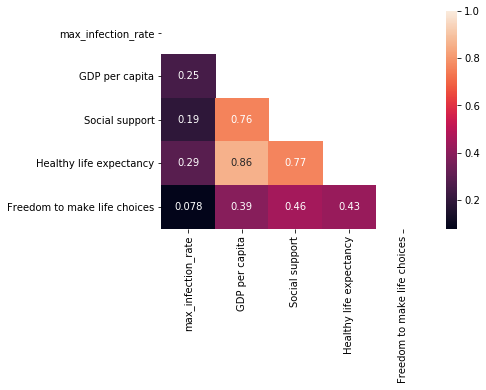

In [24]:
matrix = np.triu(data.corr())
sns.heatmap(data.corr(),annot = True,mask=matrix)

### Visualizing the results


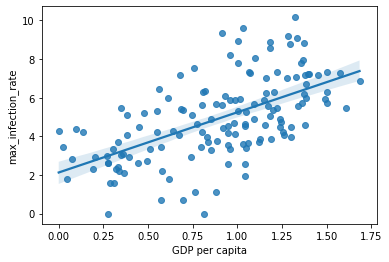

In [56]:
x=data["GDP per capita"]
y=data["max_infection_rate"]
sns.regplot(x,np.log(y))

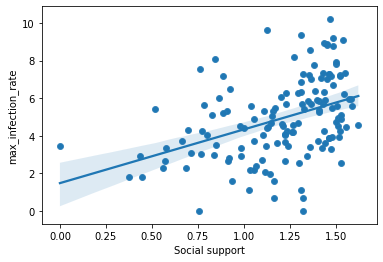

In [53]:
x=data["Social support"]
y=data["max_infection_rate"]
sns.regplot(x,np.log(y))

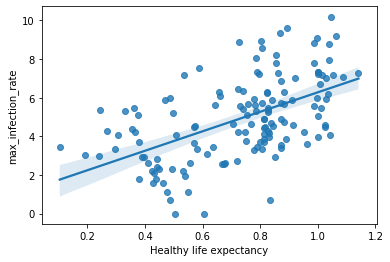

In [54]:
x=data["Healthy life expectancy"]
y=data["max_infection_rate"]
sns.regplot(x,np.log(y))

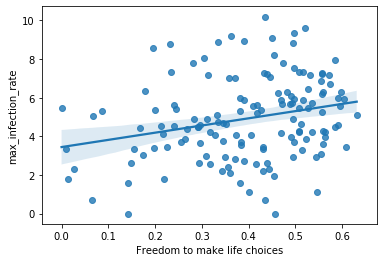

In [55]:
x=data["Freedom to make life choices"]
y=data["max_infection_rate"]
sns.regplot(x,np.log(y))

## Analysis

The analysis shows an interesting result. The people living in developed countries(lesser happiness score) are more prone to get infected by the coronavirus than the ones living in under-developed ones(higher happiness score). But this can be argued by the fact that developed nations have higher testing kits and number, thus more reports. But this can be proven wrong by the analysis on the correlation between the death rate and the happiness score as shown below. Developed countries have a higher death rate as well.

In [59]:
death_data = pd.read_csv("covid19_deaths_dataset.csv")
death_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [60]:
death_data.drop(["Lat","Long"],axis=1,inplace=True)
death_data_aggregated = death_data.groupby("Country/Region").sum()  
countrieslist = list(death_data_aggregated.index)
max_death_rates =[]
for c in countrieslist:
    max_death_rates.append(death_data_aggregated.loc[c].diff().max())
death_data_aggregated["max_death_rate"]=max_death_rates
coronadeath_data = pd.DataFrame(death_data_aggregated["max_death_rate"])
coronadeath_data.head()

,max_death_rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


In [61]:
newdata = coronadeath_data.join(world_happiness_report,how="inner")
newdata.head()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


In [65]:
newdata.corr()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_death_rate,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.394603,0.456246,0.427892,1.000000


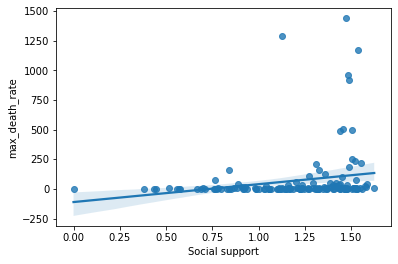

In [69]:
x=newdata["Social support"]
y=newdata["max_death_rate"]
sns.regplot(x,y)

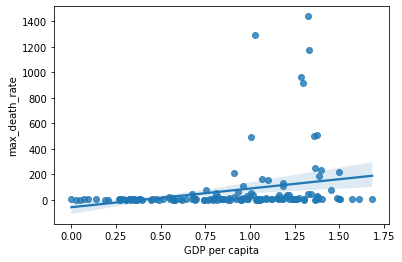

In [70]:
x=newdata["GDP per capita"]
y=newdata["max_death_rate"]
sns.regplot(x,y)